In [3]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\'
filename = '연도별 자치구별 출퇴근 이동인구 2020-2024.parquet'
start_time = time.time()
df = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df.head(5)

read_parquet time : 0.009964466094970703


,연도,출퇴근,자치구,이동인구
0,2020,출근,강남구,42087137.37
1,2020,출근,강동구,8690787.78
2,2020,출근,강북구,4228968.36
3,2020,출근,강서구,12350053.62
4,2020,출근,관악구,6552387.52


In [4]:
df

,연도,출퇴근,자치구,이동인구
0,2020,출근,강남구,42087137.37
1,2020,출근,강동구,8690787.78
2,2020,출근,강북구,4228968.36
3,2020,출근,강서구,12350053.62
4,2020,출근,관악구,6552387.52
...,...,...,...,...
245,2024,퇴근,용산구,8638774.97
246,2024,퇴근,은평구,17598681.48
247,2024,퇴근,종로구,6011493.14
248,2024,퇴근,중구,4834166.40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      250 non-null    object 
 1   출퇴근     250 non-null    object 
 2   자치구     250 non-null    object 
 3   이동인구    250 non-null    float64
dtypes: float64(1), object(3)
memory usage: 7.9+ KB


In [6]:
df_year = df[df['연도'] == '2021']
df_year

,연도,출퇴근,자치구,이동인구
50,2021,출근,강남구,52098092.55
51,2021,출근,강동구,13572213.74
52,2021,출근,강북구,6995844.17
53,2021,출근,강서구,17478375.90
54,2021,출근,관악구,9984826.77
55,2021,출근,광진구,9116537.63
56,2021,출근,구로구,14708804.11
57,2021,출근,금천구,13890628.47
58,2021,출근,노원구,12017111.69
59,2021,출근,도봉구,6132581.64


In [7]:
import pandas as pd
import numpy as np
import json

import folium

In [8]:
# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'
save_name = '(folium)지도테마_자치구구분_출퇴근이동인구_출근대여퇴근반납차_2022'

## 데이터 불러오기

### 자전거 대여소 정보

In [11]:
rental = pd.read_parquet(path_dateset + '_파킷 파일\\서울시 공공자전거 대여소 정보\\공공자전거 대여소 정보_통합본_최종.parquet')
rental.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.546135,126.821060,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.628620,127.066910,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.638157,127.073265,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.658871,127.071915,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.621864,127.074051,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


### 자치구 정보

In [13]:
geo_path = path_dateset + 'seoul_municipalities_geo_simple.json'
# geo_str = json.load(open(geo_path, encoding='cp949'))
# encoding을 UTF-8로 지정
with open(geo_path, 'rt', encoding='utf-8') as f:
    geo_str2 = json.load(f)
# # ============================

In [14]:
rental[rental['위도'].isnull()]

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
2918,04205,디지털미디어씨티역2번출구,마포구,마포구 상암동 1171-1,NaN,NaN,2020-12-02,NaN,10.0,QR,2021-01,None,NaN


### 지하철역통합_20241031.parquet

In [16]:
filename = '_최종 병합 파일\\서울교통공사 역주소 및 전화번호\\지하철역통합_20241031.parquet'
df_train_station = pd.read_parquet(path_dateset + filename)
df_train_station.head()

,연번,역번호,호선,역명,역전화번호,도로명주소,지번주소,station_code,seoulmetro_code,external_code,station_name(kor),lat,lng
0,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,651.0,4703,943,419민주묘지,37.648235,127.008614
1,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,335.0,1907,109,가능,37.748577,127.044213
2,92.0,340,3.0,가락시장,02-6110-3501,서울특별시 송파구 송파대로 지하257(가락동),서울특별시 송파구 가락동 184-23 가락시장역(3호선),78.0,340,350,가락시장,37.492522,127.118234
3,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,230.0,1702,P142,가산디지털단지,37.481072,126.882343
4,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,580.0,4107,907,가양,37.561391,126.854456


In [17]:
move = df_year.groupby('자치구')['이동인구'].sum().reset_index()
move

,자치구,이동인구
0,강남구,76043885.05
1,강동구,36669498.83
2,강북구,19336534.71
3,강서구,39417811.61
4,관악구,29100401.28
5,광진구,24694041.15
6,구로구,32034189.77
7,금천구,22321497.47
8,노원구,33732609.09
9,도봉구,18201995.36


In [18]:
move.sort_values(ascending = False, inplace = True)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [29]:
import ast

text = '"\ub3c4\ubd09\uad6c"'
decoded_text = ast.literal_eval(text)
print(decoded_text)

도봉구


### 출근대여 퇴근반납 차

In [31]:
_year='2021'

In [33]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'
filename = '출퇴근대여반납차이_' + _year + '.parquet'
start_time = time.time()
df = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df.head(5)

read_parquet time : 0.015480518341064453


,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,2.0,233.0,16.0,NaN,None,None,NaN,NaN
1,00005,NaN,46.0,1.0,NaN,None,None,NaN,NaN
2,00010,2.0,2.0,140.0,138.0,None,None,NaN,NaN
3,00101,63.0,10.0,69.0,84.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754
4,00102,1362.0,1534.0,3219.0,4047.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629


In [35]:
df.isnull().sum()

대여소번호     0
출근대여수     9
출근반납수     5
퇴근대여수     4
퇴근반납수     7
대여소명     16
상세주소     16
위도       17
경도       17
dtype: int64

In [37]:
df = df.dropna(subset=['대여소명', '위도', '경도', '출근대여수', '퇴근반납수'])
df

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
3,00101,63.0,10.0,69.0,84.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754
4,00102,1362.0,1534.0,3219.0,4047.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
5,00103,836.0,936.0,2388.0,2994.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
6,00104,492.0,947.0,1725.0,1416.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
7,00105,239.0,477.0,1064.0,975.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825
...,...,...,...,...,...,...,...,...,...
2487,04864,591.0,560.0,1239.0,1585.0,송파사거리,송파구 송파동 97-2,37.502056,127.110550
2488,04865,1383.0,1445.0,1939.0,2015.0,한성백제역 1번출구 뒤,송파구 방이동 45-4,37.516479,127.114983
2489,04867,441.0,161.0,480.0,557.0,가락대림아파트 앞,송파구 가락동 94-9,37.500027,127.118431
2490,04868,1140.0,793.0,1268.0,1466.0,석촌호수 서호 남단,송파구 석촌동 158,37.507172,127.101242


In [39]:
df.isnull().sum()

대여소번호    0
출근대여수    0
출근반납수    2
퇴근대여수    0
퇴근반납수    0
대여소명     0
상세주소     0
위도       0
경도       0
dtype: int64

In [41]:
df['퇴근반납수-출근대여수'] = df['퇴근반납수'] - df['출근대여수']
top_20 = df.nlargest(20, '퇴근반납수-출근대여수')
top_20

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
846,01153,4634.0,3241.0,8004.0,12293.0,"발산역 1번, 9번 인근 대여소",서울특별시 강서구 공항대로 281,37.558949,126.837174,7659.0
1470,02102,2935.0,2172.0,5778.0,9562.0,봉림교 교통섬,서울특별시 관악구 관천로 52,37.484085,126.926888,6627.0
357,00502,3667.0,5910.0,8426.0,9821.0,뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192,6154.0
159,00274,4668.0,2160.0,3909.0,10042.0,영등포역지하쇼핑센타 5번출구,서울특별시 영등포구 경인로 846,37.516270,126.906860,5374.0
2024,03533,1909.0,3833.0,6443.0,7223.0,건대입구역 사거리(롯데백화점),서울특별시 광진구 능동로 92 건대입구역 사거리(롯데백화점),37.539139,127.070618,5314.0
557,00765,1927.0,3148.0,5603.0,7021.0,오목교역 3번출구,서울특별시 양천구 목동동로 270,37.524776,126.875481,5094.0
896,01210,4630.0,8095.0,11982.0,9538.0,롯데월드타워(잠실역2번출구 쪽),서울특별시 송파구 올림픽로 293-19,37.513126,127.100960,4908.0
1836,02715,8968.0,10181.0,13670.0,13771.0,마곡나루역 2번 출구,강서구 마곡중앙5로 6,37.566925,126.827438,4803.0
1848,02728,6396.0,5019.0,7372.0,10827.0,마곡나루역 3번 출구,강서구 마곡동 372-23,37.565804,126.828079,4431.0
1183,01637,1304.0,1836.0,5950.0,5514.0,KT 전화국 버스정류장 옆,서울특별시 노원구 노해로 489 노원구 상계동 719-1,37.654701,127.063400,4210.0


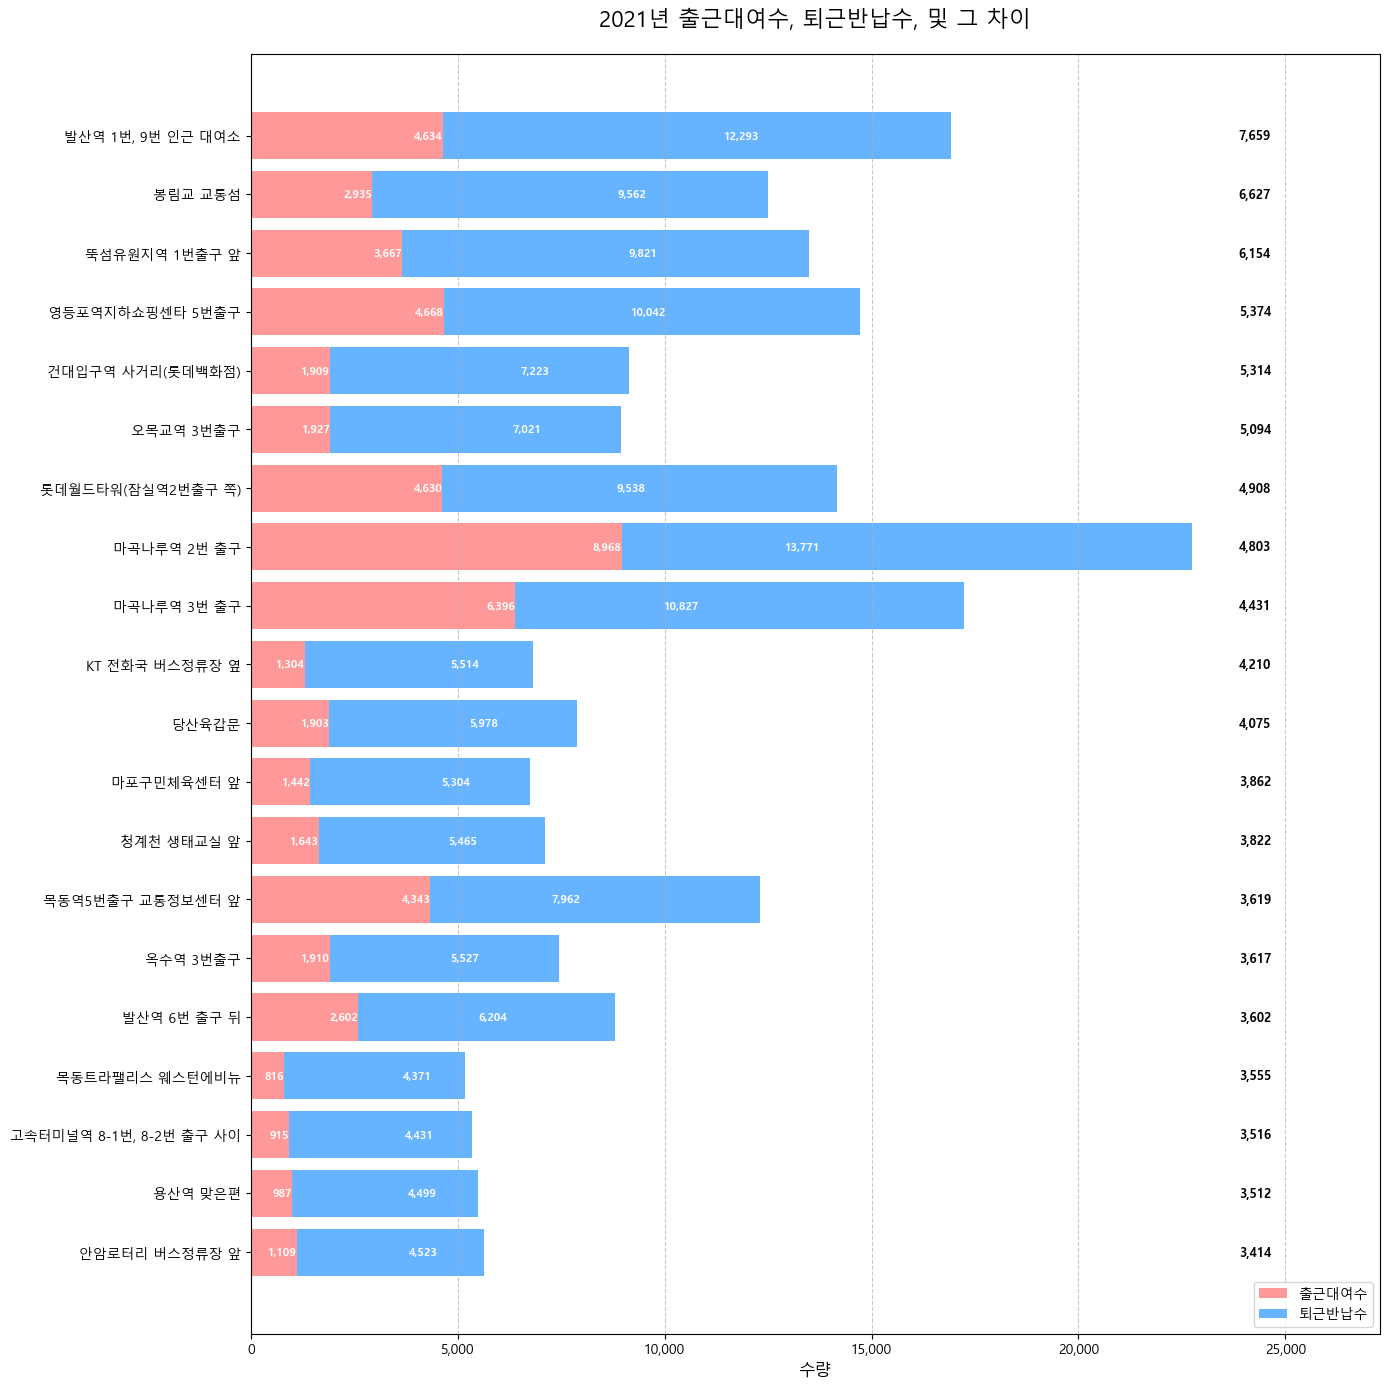

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(14, 14))  # 가로 길이를 늘림

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], label='퇴근반납수', color=colors[1])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('2021년 출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 각 막대에 값 표시
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
                ha='right', va='center', fontweight='bold', fontsize=8, color='white')

bars1 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], color=colors[0])
bars2 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], color=colors[1])

add_value_labels(bars1)
add_value_labels(bars2)

# 차이 값 표시 (가장 오른쪽에)
max_value = top_20_sorted[['출근대여수', '퇴근반납수']].sum(axis=1).max()
for i, value in enumerate(top_20_sorted['차이']):
    ax.text(max_value * 1.05, i, f'{int(value):,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

# x축 범위 조정
ax.set_xlim(0, max_value * 1.2)

plt.tight_layout()
plt.show()

In [45]:
import folium
import pandas as pd
import json
import webbrowser

# 지도 생성
center = [37.541, 126.986]
bike_map = folium.Map(location=center, zoom_start=13, tiles='openstreetmap', name='OpenStreetMap')

# 상위 10개와 20개 데이터로 나누기
top_10 = top_20.nlargest(10, '퇴근반납수-출근대여수')
top_10_ids = top_10.index  # 상위 10개의 인덱스를 가져와서 색상 구분에 사용

fg1 = folium.FeatureGroup(name="bike_rental", show=False).add_to(bike_map)

# 자전거 대여소 표시 (원 크기를 '퇴근반납수-출근대여수' 값에 비례하여 설정)
max_value = top_20['퇴근반납수-출근대여수'].max()  # '퇴근반납수-출근대여수'의 최대값
min_radius, max_radius = 10, 1000  # 최소 및 최대 원 크기

seq = 1
for i, row in top_20.iterrows():
    # '퇴근반납수-출근대여수' 값을 원 크기로 변환
    radius = min_radius + (row['퇴근반납수-출근대여수'] / max_value) * (max_radius - min_radius)
    
    # 색상 설정: 상위 10개 대여소는 빨간색, 나머지는 파란색
    fill_color = 'coral' if i in top_10_ids else 'turquoise'
    
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=radius,
        color='black',
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.9,
        popup=row['대여소번호'],
        tooltip=str(seq) + '. ' + row['대여소명']
    ).add_to(fg1)

    seq = seq + 1

# 자치구 구분 JSON 파일 로드
geo_str2 = json.load(open('G:\\내 드라이브\\DataSet\\seoul_municipalities_geo_simple.json', encoding='utf-8'))

# Choropleth 생성
choropleth = folium.Choropleth(
    geo_data=geo_str2,
    data=move,
    columns=['자치구', '이동인구'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='BuGn',
    fill_opacity=0.3
)

# GeoJsonPopup 추가
folium.GeoJsonPopup(fields=['SIG_KOR_NM'], aliases=['지역:'], style='font-weight: bold;').add_to(choropleth.geojson)

# Choropleth를 지도에 추가
choropleth.add_to(bike_map)

# 타일 레이어 및 레이어 컨트롤 추가
folium.TileLayer('cartodbpositron', name='CartoDB Positron').add_to(bike_map)
folium.TileLayer('cartodbdark_matter', name='CartoDB Dark Matter').add_to(bike_map)
folium.LayerControl().add_to(bike_map)

# 지도 저장 및 웹 브라우저에서 열기
save_name = "(folium)지도테마_자치구구분_출퇴근이동인구_출근대여퇴근반납차_2021"
bike_map.save(save_name + ".html")
webbrowser.open(save_name + ".html")

True